In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Load the dataset
fir_df =pd.read_csv("preprocessed_df1.csv", low_memory=False)



In [2]:
fir_df

,District_Name,UnitName,FIRNo,RI,Year,Month,Offence_From_Date,Offence_To_Date,FIR_Reg_DateTime,FIR Type,...,Arrested Male,Arrested Female,Arrested Count\tNo.,Accused_ChargeSheeted Count,Conviction Count,FIR_ID,Unit_ID,Crime_No,Year_Month,Coordinates
0,Bagalkot,Amengad PS,0001/2016,1,2016,1,2015-12-27 12:00:00,2015-12-27 12:05:00,2016-01-05 11:00:00.000,Non Heinous,...,1,0,1,1,0,2016000002,1245,10470124520160001,2016-1,POINT (0 0)
1,Bagalkot,Amengad PS,0002/2016,1,2016,1,2016-01-12 17:30:00,2016-01-12 17:35:00,2016-01-12 19:00:00.000,Non Heinous,...,5,0,5,5,2,2016000003,1245,10470124520160002,2016-1,POINT (0 0)
2,Bagalkot,Amengad PS,0003/2016,1,2016,1,2016-01-12 17:45:00,2016-01-12 17:50:00,2016-01-12 19:30:00.000,Non Heinous,...,1,0,1,1,0,2016000004,1245,10470124520160003,2016-1,POINT (0 0)
3,Bagalkot,Amengad PS,0004/2016,1,2016,1,2016-01-14 21:30:00,2016-01-14 21:35:00,2016-01-15 14:00:00.000,Non Heinous,...,1,0,1,1,0,2016000005,1245,10470124520160004,2016-1,POINT (0 0)
4,Bagalkot,Amengad PS,0005/2016,1,2016,1,2016-01-18 15:00:00,2016-01-18 15:05:00,2016-01-18 19:30:00.000,Heinous,...,1,0,1,1,0,2016000006,1245,10470124520160005,2016-1,POINT (0 0)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674729,Yadgir,Yadgiri Women PS,0002/2024,1,2024,1,2024-01-10 05:30:00,2024-01-10 21:30:00,2024-01-11 21:30:00.000,Non Heinous,...,0,0,0,0,0,2024000002,2183,10978218320240002,2024-1,POINT (77.133669 16.748633)
1674730,Yadgir,Yadgiri Women PS,0003/2024,1,2024,1,2024-01-19 22:30:00,2024-01-19 22:35:00,2024-01-29 19:30:00.000,Heinous,...,0,0,0,0,0,2024000003,2183,10978218320240003,2024-1,POINT (77.021722 16.844536)
1674731,Yadgir,Yadgiri Women PS,0004/2024,1,2024,2,2024-02-06 15:42:00,2024-02-06 15:45:00,2024-02-07 17:45:00.000,Non Heinous,...,0,0,0,0,0,2024000004,2183,10978218320240004,2024-2,POINT (77.159238 16.556974)
1674732,Yadgir,Yadgiri Women PS,0005/2024,1,2024,2,2024-02-19 12:10:00,2024-02-19 12:15:00,2024-02-24 17:00:00.000,Heinous,...,0,0,0,0,0,2024000005,2183,10978218320240005,2024-2,POINT (77.117018 16.772232)


In [3]:
import pandas as pd

# Sample crime group names
crime_groups = ['POCSO', 'KARNATAKA POLICE ACT 1963', 'MOTOR VEHICLE ACCIDENTS NON-FATAL',
                'MOTOR VEHICLE ACCIDENTS FATAL', 'THEFT', 'CrPC', 'CRUELTY BY HUSBAND',
                'ATTEMPT TO MURDER', 'CHEATING', 'Karnataka State Local Act', 'ELECTION',
                ' REPRESENTATION OF PEOPLE ACT 1951 & 1988', 'MOLESTATION', 'MISSING PERSON',
                'CASES OF HURT', 'FORGERY', 'SCHEDULED CASTE AND THE SCHEDULED TRIBES ',
                'BURGLARY - NIGHT', 'NEGLIGENT ACT', 'MURDER', 'RIOTS', 'Attempting to commit offences',
                'KIDNAPPING AND ABDUCTION', 'EXPLOSIVES', 'EXPOSURE AND ABANDONMENT OF CHILD', 'ARSON',
                'CONSUMER', 'OFFENCES AGAINST PUBLIC SERVANTS (Public servant is a victim)',
                'CRIMES RELATED TO WOMEN', 'DEATHS DUE TO RASHNESS/NEGLIGENCE', 'COMMUNAL / RELIGION   ',
                'DOWRY DEATHS', 'CRIMINAL BREACH OF TRUST', 'DACOITY',
                ' PREVENTION OF DAMAGE TO PUBLIC PROPERTY ACT 1984', 'BURGLARY - DAY', 'ANIMAL', 'MISCHIEF',
                'INSULTING MODESTY OF WOMEN (EVE TEASING)', 'CRIMINAL TRESPASS', 'CRIMINAL INTIMIDATION',
                'CRIMINAL CONSPIRACY', 'SUICIDE', 'NARCOTIC DRUGS & PSHYCOTROPIC SUBSTANCES', 'PUBLIC SAFETY',
                'CHILDREN ACT', 'ROBBERY', 'RAPE', 'ANTIQUES (CULTURAL PROPERTY)', ' CYBER CRIME',
                'Concealment of birth by secret disposal of Child', 'FOREST', 'AFFRAY',
                'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'DEFAMATION',
                'ATTEMPT TO CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'WRONGFUL RESTRAINT/CONFINEMENT',
                'COTPA, CIGARETTES AND OTHER TOBACCO PRODUCTS', 'CRIMINAL MISAPPROPRIATION ',
                'Disobedience to Order Promulgated by PublicServan', 'UNNATURAL SEX ',
                'POISONING-PROFESSIONAL', 'ASSAULT', 'ARMS ACT  1959', 'SEDITION', 'COPY RIGHT ACT 1957',
                'OF ABETMENT', 'OFFENCES RELATED TO MARRIAGE', 'PUBLIC NUISANCE', 'Failure to appear to Court',
                'ADULTERATION', ' POST & TELEGRAPH,TELEGRAPH WIRES(UNLAWFUL POSSESSION)ACT 1950',
                'IMPERSONATION ', 'PUBLIC JUSTICE', 'INDIAN MOTOR VEHICLE',
                'ASSAULT OR USE OF CRIMINAL FORCE TO DISROBE WOMAN', 'COUNTERFEITING', 'DEATHS-MISCARRIAGE',
                'PORNOGRAPHY', 'OFFENCES PROMOTING ENEMITY', 'IMMORAL TRAFFIC', 'FALSE EVIDENCE',
                'BONDED LABOUR SYSTEM', 'ESCAPE FROM LAWFUL CUSTODY AND RESISTANCE', 'PASSPORT ACT',
                'Human Trafficking', 'OFFENCES BY PUBLIC SERVANTS (EXCEPT CORRUPTION) (Public servant is accused)',
                'SLAVERY', 'Giving false information respecting an offence com', 'FOREIGNER',
                'RECEIVING OF STOLEN PROPERTY', 'UNLAWFUL ACTIVITIES(Prevention)ACT 1967 ',
                'UNNATURAL DEATH (Sec 174/174c/176)', 'CINEMATOGRAPH ACT 1952', 'DOCUMENTS & PROPERTY MARKS',
                'OFFICIAL SECURITY RELATED ACTS', 'DEFENCE FORCES OFFENCES RELATING TO (also relating to desertion)',
                'INDIAN ELECTRICITY ACT ', 'PREVENTION OF CORRUPTION ACT 1988', 'INFANTICIDE',
                'NATIONAL SECURITY ACT', 'ILLEGAL DETENTION', 'RAILWAYS ACT', 'OFFENCES AGAINST STATE',
                'CIVIL RIGHTS ', 'FAILURE TO APPEAR TO COURT', 'BUYING & SELLING MINOR FOR PROSTITUTION']

# Mapping of crime groups to minimal categories
crime_mapping = {
    'Violent Crime': ['ATTEMPT TO MURDER', 'MURDER', 'RAPE', 'ASSAULT', 'WRONGFUL RESTRAINT/CONFINEMENT', 'KIDNAPPING AND ABDUCTION'],
    'Property Crime': ['THEFT', 'BURGLARY - NIGHT', 'BURGLARY - DAY', 'ROBBERY', 'ARSON'],
    'Sexual Offenses': ['POCSO', 'MOLESTATION', 'RAPE', 'ASSAULT OR USE OF CRIMINAL FORCE TO DISROBE WOMAN', 'UNNATURAL SEX '],
    'Fraud': ['CHEATING', 'FORGERY', 'CRIMINAL BREACH OF TRUST', 'CRIMINAL MISAPPROPRIATION ', 'COUNTERFEITING', 'FRAUD', 'DEFAMATION'],
    'Traffic Offenses': ['MOTOR VEHICLE ACCIDENTS NON-FATAL', 'MOTOR VEHICLE ACCIDENTS FATAL'],
    'Public Order Crimes': ['RIOTS', 'COMMUNAL / RELIGION', 'PUBLIC SAFETY', 'AFFRAY', 'PUBLIC NUISANCE', 'PUBLIC JUSTICE'],
    'Other': ['OTHER CRIMES']
}

# Function to map crime groups to minimal categories
def map_to_category(crime):
    for category, crimes in crime_mapping.items():
        if crime in crimes:
            return category
    return 'Other'

# Apply the mapping to the crime groups
mapped_categories = [map_to_category(crime) for crime in crime_groups]

# Create a DataFrame to display the original crime groups and their mapped categories
df = pd.DataFrame({'Crime Group': crime_groups, 'Category': mapped_categories})
print(df)


                                 Crime Group          Category
0                                      POCSO   Sexual Offenses
1                  KARNATAKA POLICE ACT 1963             Other
2          MOTOR VEHICLE ACCIDENTS NON-FATAL  Traffic Offenses
3              MOTOR VEHICLE ACCIDENTS FATAL  Traffic Offenses
4                                      THEFT    Property Crime
..                                       ...               ...
102                             RAILWAYS ACT             Other
103                   OFFENCES AGAINST STATE             Other
104                            CIVIL RIGHTS              Other
105               FAILURE TO APPEAR TO COURT             Other
106  BUYING & SELLING MINOR FOR PROSTITUTION             Other

[107 rows x 2 columns]


In [4]:
fir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674734 entries, 0 to 1674733
Data columns (total 41 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   District_Name                1674734 non-null  object 
 1   UnitName                     1674734 non-null  object 
 2   FIRNo                        1674734 non-null  object 
 3   RI                           1674734 non-null  int64  
 4   Year                         1674734 non-null  int64  
 5   Month                        1674734 non-null  int64  
 6   Offence_From_Date            1674734 non-null  object 
 7   Offence_To_Date              1674734 non-null  object 
 8   FIR_Reg_DateTime             1674734 non-null  object 
 9   FIR Type                     1674734 non-null  object 
 10  FIR_Stage                    1674734 non-null  object 
 11  Complaint_Mode               1674734 non-null  object 
 12  CrimeGroup_Name              1674734 non-n

In [5]:
#columns_to_keep = ['District_Name', 'UnitName', 'Year', 'Month', 'Offence_From_Date', 'Offence_To_Date', 'FIR Type', 'CrimeGroup_Name', 'Latitude', 'Longitude']

#fir_df = fir_df[columns_to_keep]


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import argparse
import json
import pprint
import requests
import sys
import urllib
from urllib.error import HTTPError
from urllib.parse import quote
from urllib.parse import urlencode
%matplotlib inline
import seaborn as sns

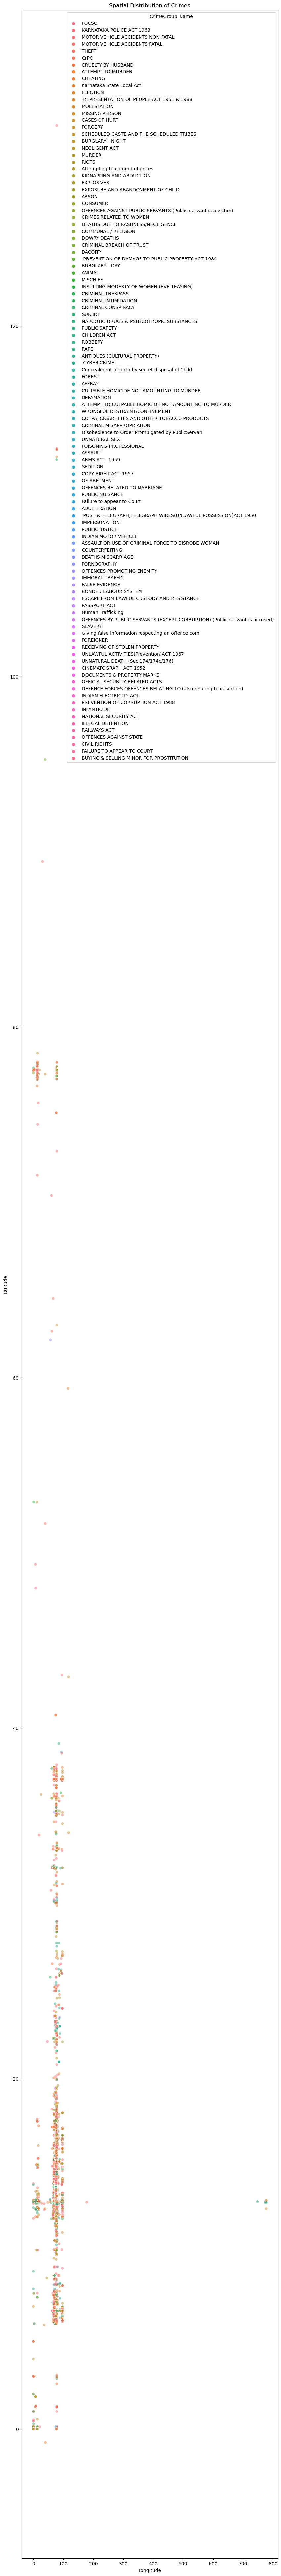

In [7]:
# Spatial Analysis of Crime with adjusted transparency
plt.figure(figsize=(10, 100))
sns.scatterplot(x='Longitude', y='Latitude', data=fir_df, hue='CrimeGroup_Name', alpha=0.5)
plt.title('Spatial Distribution of Crimes')
plt.show()


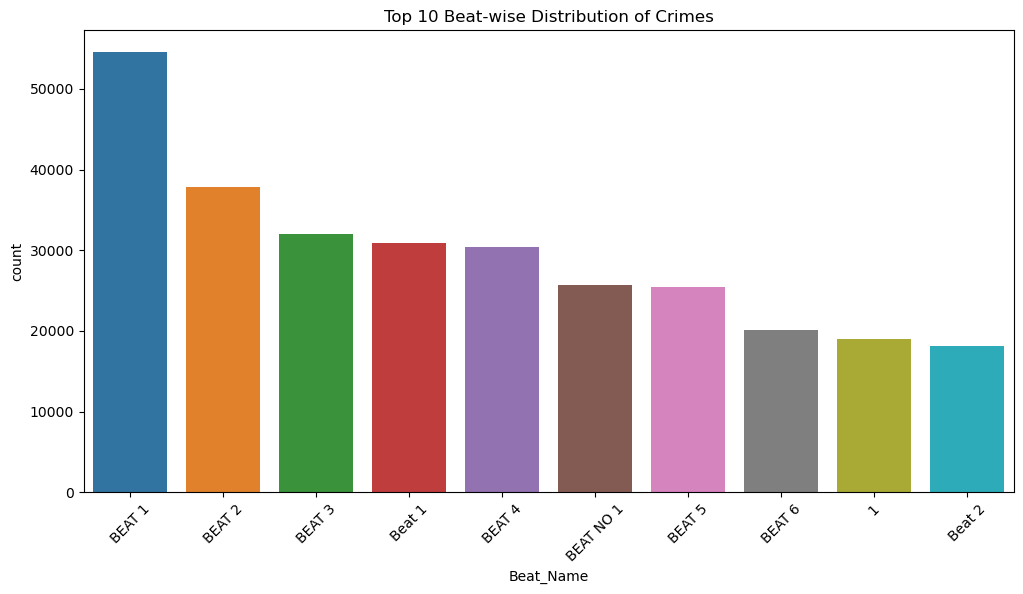

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Beat_Name', data=fir_df, order=fir_df['Beat_Name'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title('Top 10 Beat-wise Distribution of Crimes')
plt.show()

In [9]:
len(fir_df.Beat_Name.unique())

6771

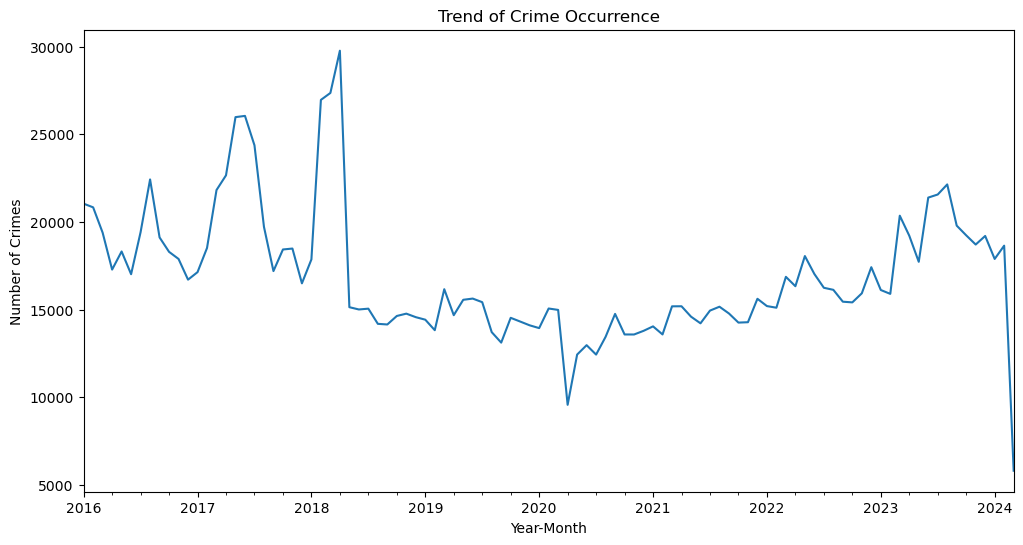

In [10]:
fir_df['FIR_Reg_DateTime'] = pd.to_datetime(fir_df['FIR_Reg_DateTime'])
fir_df['Year_Month'] = fir_df['FIR_Reg_DateTime'].dt.to_period('M')
monthly_crime = fir_df['Year_Month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
monthly_crime.plot(kind='line')
plt.title('Trend of Crime Occurrence')
plt.xlabel('Year-Month')
plt.ylabel('Number of Crimes')
plt.show()


In [11]:
fir_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674734 entries, 0 to 1674733
Data columns (total 41 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   District_Name                1674734 non-null  object        
 1   UnitName                     1674734 non-null  object        
 2   FIRNo                        1674734 non-null  object        
 3   RI                           1674734 non-null  int64         
 4   Year                         1674734 non-null  int64         
 5   Month                        1674734 non-null  int64         
 6   Offence_From_Date            1674734 non-null  object        
 7   Offence_To_Date              1674734 non-null  object        
 8   FIR_Reg_DateTime             1674734 non-null  datetime64[ns]
 9   FIR Type                     1674734 non-null  object        
 10  FIR_Stage                    1674734 non-null  object        
 11  Complaint_M

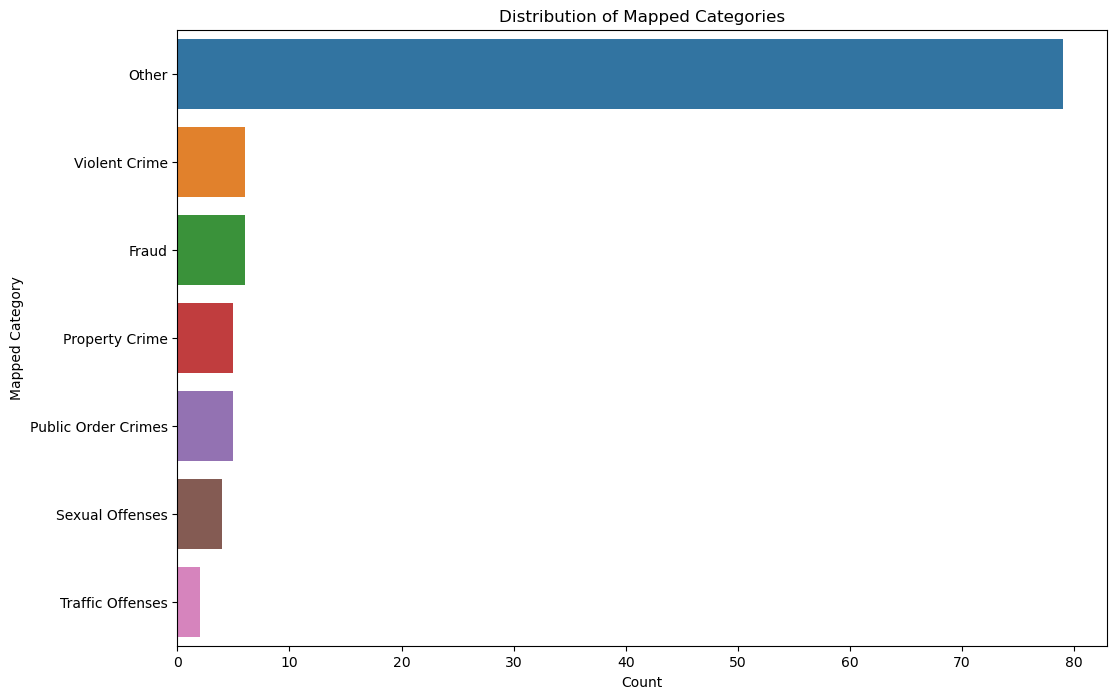

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Category' is the column containing the mapped categories
plt.figure(figsize=(12, 8))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Mapped Category')
plt.title('Distribution of Mapped Categories')
plt.show()


In [13]:
beat_duties_comparison = pd.crosstab(fir_df['Beat_Name'], fir_df['FIRNo']).transpose()


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [15]:
selected_columns = ['District_Name', 'UnitName', 'Year', 'Month', 'CrimeGroup_Name', 'Latitude', 'Longitude', 'Accused Count', 'VICTIM COUNT']


In [16]:
data = fir_df[selected_columns]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, fir_df['CrimeGroup_Name'], test_size=0.2, random_state=42)


In [28]:
from sklearn.preprocessing import OneHotEncoder


In [29]:
categorical_columns = ['District_Name', 'UnitName']

In [30]:
encoder = OneHotEncoder(sparse=True, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

C:\Users\HP\Downloads\Anaconda2023\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
categorical_columns = ['District_Name', 'UnitName']

In [32]:
X_train_encoded = pd.DataFrame()
X_test_encoded = pd.DataFrame()

In [33]:
batch_size = 10000

In [34]:
for i in range(0, len(X_train), batch_size):
    X_train_batch = X_train.iloc[i:i+batch_size]
    # Check if categorical columns are present in the batch
    if not set(categorical_columns).issubset(X_train_batch.columns):
        continue  # Skip this batch if columns are missing
    encoder = OneHotEncoder(sparse=True, handle_unknown='ignore')
    X_train_encoded_batch = encoder.fit_transform(X_train_batch[categorical_columns])
    X_train_encoded = pd.concat([X_train_encoded, pd.DataFrame.sparse.from_spmatrix(X_train_encoded_batch)], axis=0)


C:\Users\HP\Downloads\Anaconda2023\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\HP\Downloads\Anaconda2023\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\HP\Downloads\Anaconda2023\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\HP\Downloads\Anaconda2023\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in 

In [35]:
for i in range(0, len(X_test), batch_size):
    X_test_batch = X_test.iloc[i:i+batch_size]
    if not set(categorical_columns).issubset(X_test_batch.columns):
        continue
    X_test_encoded_batch = encoder.transform(X_test_batch[categorical_columns])
    X_test_encoded = pd.concat([X_test_encoded, pd.DataFrame.sparse.from_spmatrix(X_test_encoded_batch)], axis=0)

In [36]:
columns_to_drop = ['District_Name', 'UnitName']
X_train = X_train.drop(columns=[col for col in columns_to_drop if col in X_train.columns], axis=1)
X_test = X_test.drop(columns=[col for col in columns_to_drop if col in X_test.columns], axis=1)


In [37]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)



In [39]:
from sklearn.utils import shuffle

# Reduce the length of X_train and y_train
half_length = min(len(X_train)//2, len(y_train))
X_train = X_train[:half_length]
y_train = y_train[:half_length]

# Shuffle the data to ensure randomness
X_train, y_train = shuffle(X_train, y_train, random_state=42)

# Train the model



In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



In [42]:
categorical_columns = ['District_Name', 'UnitName', 'FIR Type', 'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name', 'CrimeHead_Name', 'ActSection', 'IOName', 'Internal_IO', 'Place of Offence', 'Beat_Name', 'Village_Area_Name']
numerical_columns = ['RI', 'Year', 'Month', 'Distance from PS', 'Male', 'Female', 'Boy', 'Girl', 'Age 0', 'VICTIM COUNT', 'Accused Count', 'Arrested Male', 'Arrested Female', 'Arrested Count', 'Accused_ChargeSheeted Count', 'Conviction Count']


In [43]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ]
)


In [44]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

In [47]:
fir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674734 entries, 0 to 1674733
Data columns (total 41 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   District_Name                1674734 non-null  object        
 1   UnitName                     1674734 non-null  object        
 2   FIRNo                        1674734 non-null  object        
 3   RI                           1674734 non-null  int64         
 4   Year                         1674734 non-null  int64         
 5   Month                        1674734 non-null  int64         
 6   Offence_From_Date            1674734 non-null  object        
 7   Offence_To_Date              1674734 non-null  object        
 8   FIR_Reg_DateTime             1674734 non-null  datetime64[ns]
 9   FIR Type                     1674734 non-null  object        
 10  FIR_Stage                    1674734 non-null  object        
 11  Complaint_M